# Gap (prelaunch) 0.9 - July 2018
## NLP and CV Data Engineering Framework

<b>[Github](https://github.com/andrewferlitsch/gap)</b>

# Document Preparation for NLP

## Applications (Open Source) Recommended

1. Artifex's Ghostscript - extracting text from text PDF
2. ImageMagic's Magick - extracting image from scanned PDF
3. Google's Tesseract - OCR of scanned/image captured text
4. NLTK Toolkit - Syntax Analysis/Parts of Speech

### Github Account

https://github.com/andrewferlitsch/epipog-nlp

### Ghostscript

1. Download link : https://www.ghostscript.com/download/gsdnld.html
        
    Use the Free Version<br/>

    I have a 64bit Windows laptop, so I am using this version: Ghostscript 9.23 for Windows (64 bit).<br/><br/>

2. Check if path to the program is in your PATH variable. 

    A. Open a command shell.<br/>
    B. Type gswin64c in the command line.<br/>
    C. If not found, add it to your path variable. For me, it is: C:\Program Files\gs\gs9.23\bin<br/>




### Magick

1. Download Link: https://www.imagemagick.org/script/download.php

    Use the static version (dynamic is for DLL inclusion).<br/>
    
    Use the 8bits per pixel version.<br/>
    
    I have a 64bit Windows laptop, so I am using this version: ImageMagick-7.0.8-1-Q8-x64-static.exe<br/><br/>
    
2. Check if path to the program is in your PATH variable.
 
    A. Open a command shell.<br/>
    B. Type magick in the command line.<br/>
    C. If not found, add it to your path variable. For me, it is: C:\Program Files\ImageMagic-7.0.8-Q8

### Tesseract

1. Download Link: https://github.com/tesseract-ocr/tesseract/wiki/Downloads

    A. Make sure to add the English Language training data to the tessdata subdirectory where tesseract is installed.<br/><br/>

2. Check if path to program is in your PATH variable:

    A. Open a command shell.<br/>
    B. Type tesseract in the command line.<br/>
    C. If not found, add it your path variable. For me, it is C:\Program Files\tesseract-Win64\<br/>
    
3. Install the English Training Data files as: C:\Program Files\tesseract-Win64\tessdata

    You can get a copy from my github account.

### NLTK Toolkit

1. Documentation: http://www.nltk.org/


2. Install NLTK using pip:

    pip install nltk


### Ghostscript Example: Extracting Text from Text PDF

Let's try some examples with using Ghostscript and PDF documents.

First, let's get the number of pages in the PDF. (yes, ghostscript's options are somewhat cryptic). We will do it on a 140 page file.

In [3]:
import os
os.chdir("../")
%ls

 Volume in drive C has no label.
 Volume Serial Number is 5E06-54F2

 Directory of C:\Users\baker\source\repos\Gap

09/20/2018  08:53 PM    <DIR>          .
09/20/2018  08:53 PM    <DIR>          ..
09/15/2018  12:33 PM               434 .gitignore
09/20/2018  08:11 PM    <DIR>          .ipynb_checkpoints
09/15/2018  12:31 PM    <DIR>          .kaggle
09/20/2018  05:14 PM    <DIR>          .pytest_cache
09/20/2018  08:53 PM    <DIR>          .vs
09/11/2018  06:02 PM    <DIR>          .vscode
09/10/2018  01:53 PM    <DIR>          build
09/19/2018  01:08 PM             3,032 collection.untitled.h5
09/20/2018  08:35 PM            80,396 comprehensive-data-exploration-with-python.ipynb
09/10/2018  01:53 PM    <DIR>          dist
09/10/2018  12:32 AM    <DIR>          docs
09/19/2018  10:31 AM    <DIR>          gapml
09/10/2018  01:53 PM    <DIR>          gapml.egg-info
09/19/2018  11:21 AM           542,946 image_test.txt
09/11/2018  02:56 PM    <DIR>          imagenet
09/19/2018  11:17 P

In [4]:
#use !gs on Linux
!gswin64c -dBATCH -q -dNODISPLAY -c "("tests/plan/afspa.pdf") (r) file runpdfbegin pdfpagecount = quit"

140


Let's now try to split a PDF into individual pages. In the command below, we tell Ghostscript to split out page 1. We could
do this in a for loop and extract each page one at a time.

Note that we set the output DEVICE to pdfwrite. This is the command to Ghostscript to output a PDF file.

In [5]:
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="tests/plan/afspa1.pdf" -sPageList=1 -sDEVICE=pdfwrite "tests/plan/afspa.pdf"

GPL Ghostscript 9.24 (2018-09-03)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


GPL Ghostscript 9.24: ERROR: A pdfmark destination page 140 points beyond the last page 1.


Let's look at what is inside of the first PDF page. Is it text, a scanned image, a mix of text and images? We can guessimate this by looking at the PDF Resource directive inside of the PDF file.

    /Text   -> Text
    /ImageB -> B&W Image
    /ImageC -> Color Image
    /ImageI -> Indexed Image

We will do this using Epipog's PDFResource object. We will also set the debug flag to output the version and PDF resources found to the standard output.

In [6]:
# Import Epipog PDFResource class from the pdf_res module
from gapml.pdf_res import PDFResource

In [7]:
res = PDFResource("tests/plan/afspa1.pdf", debug=True)

PDF Version 1.7
resources  /ImageC /ImageI /Text]



The PDFResource properties text and image will tell us if the PDF file contains text and/or images respectively.

In [8]:
# Let's now check whether the page is a text PDF, scanned PDF, or mix text and images.
print(res.text)
print(res.image)

True
True


Let's now extract the text from this single page PDF file using Ghostscript.

Note that we set the output DEVICE to txtwrite. This is the command to Ghostscript to output a PDF file.

In [9]:
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="tests/plan/afspa1.txt" -sPageList=1 -sDEVICE=txtwrite "tests/plan/afspa1.pdf"

GPL Ghostscript 9.24 (2018-09-03)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


In [10]:
# use !ls on linux
!dir tests\\plan\\afspa*.pdf

 Volume in drive C has no label.
 Volume Serial Number is 5E06-54F2

 Directory of C:\Users\baker\source\repos\Gap\tests\plan

09/10/2018  12:32 AM         1,787,053 afspa.pdf
09/20/2018  08:58 PM           261,240 afspa1.pdf
               2 File(s)      2,048,293 bytes
               0 Dir(s)  105,409,290,240 bytes free


Let's try another PDF document, which will have an unexpected result - which I will explain.

In [11]:
# Split page 1 from the PDF file
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="tests/plan/il1.pdf" -sPageList=1 -sDEVICE=pdfwrite "tests/plan/il.pdf"

# Extract the text from the PDF page
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="tests/plan/il1.txt" -sPageList=1 -sDEVICE=txtwrite "tests/plan/il1.pdf"

GPL Ghostscript 9.24 (2018-09-03)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1
GPL Ghostscript 9.24 (2018-09-03)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


Let's view the contents of the extracted text file.

OMG. It's just a lot of unprintable ASCII control characters. What happened?

The PDF Resource directive is just a hint. It doesn't mean that it is correct. So, in this case, this is really a scanned PDF.

In [12]:
!notepad.exe tests\\plan\\il1.txt

### Ghostscript/Tesseract Example:  Extract Text from Scanned PDF example

So the il.pdf file appears to be a scanned PDF. So, let's extract the scanned page as a PNG image using Ghostscript.

This time, we will set the output device to a grayscale PNG image. Ghostscript actually renders an image (vs. merely extract). This gives us an opportunity to tell Ghostscript the resolution of the generated image, which will affect the OCR quality. I good rule of thumb is 300dpi. I've found 72 and 150dpi give poor OCR, 200 is okay on many things, but 300 generally is good for all cases.


In [13]:
# Extract the scanned image from the PDF page
!gswin64c -dBATCH -dNOPAUSE -sOutputFile="tests/plan/il1.png" -sPageList=1 -sDEVICE=pnggray  -r300 "tests/plan/il1.pdf"

GPL Ghostscript 9.24 (2018-09-03)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1.
Page 1


Now we will use Tesseract to extract the text from the PNG image.

In [14]:
!tesseract "tests/plan/il1.png" "tests/plan/il1"

Tesseract Open Source OCR Engine v3.05.01 with Leptonica


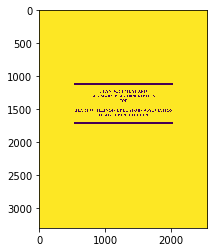

In [16]:
import matplotlib.pyplot as plt

# This line is specific to python notebooks (not python). 
# It causes plots to automatically be rendered (displayed) without issuing a show command.
%matplotlib inline

# Importing OpenCV
import cv2
image = cv2.imread("tests/plan/il1.png", 0)
plt.imshow(image)

In [17]:
#clean dir
os.remove('tests/plan/afspa1.pdf')
os.remove('tests/plan/afspa1.txt')

os.remove('tests/plan/il1.pdf')
os.remove('tests/plan/il1.png')
os.remove('tests/plan/il1.txt')

## END OF SESSION 0